<a href="https://colab.research.google.com/github/rhiamg/rhiamg/blob/main/Projeto_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bibliotecas:**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

# Matplotlib
O Matplotlib é uma biblioteca de plotagem 2D do Python que produz números de qualidade de publicação em vários formatos de cópia impressa e ambientes interativos entre plataformas, para criar visualizações estáticas. O Matplotlib pode ser usado em scripts Python, nos shell Python e IPython, notebooks Jupyter e em servidores web LOPES et al. (2022).

# SeaBorn
Seaborn é uma biblioteca de visualização de dados Python baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sendo uma das principais bibliotecas para visualização de dados e que conta com uma das melhores documentações (VINICIUS, 2020). 

# SciPy
Fornece um amplo espectro de funções matemáticas e rotinas numéricas para Python. SciPy faz uso
extensivo de matrizes numpy, portanto, ao importá-lo, deve-se importar numpy também. Com numpy fornecendo
funções matemáticas básicas, rotinas para fazer ajuste de curva e resolução numérica de equações diferenciais (BRAGA, 2021). 


# Collections Counter
Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagem (PYTHON, 2022).

# Sklearn

É uma biblioteca open source de machine learning para Python com fácil utilização, intuitiva e replicável, fácil integração com outros pacotes do Python como Pandas, Matplotlib, Numpy, etc. Também foi desenvolvida para suportar e possibilitar o treino de diversas técnicas de estatística e Machine Learning, para aprendizagem supervisionada e não supervisionada (PACHECO, 2021).

# FilterWarnigns

É uma função usada para suprimir os avisos quando alguma classe, função, palavra-chave desatualizada, são usados, mas que não são iguais a erros, pois o programa continua a rodar (DELFSTACK, 2021).

In [2]:
#importação dos dados
dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

# Head
Especifica o número de valores a serem selecionados e retornados (DELFSTACK, 2021).

In [12]:
dados.head(10)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010.0,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7.0,1977.0,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010.0,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6.0,1997.0,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010.0,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6.0,1962.0,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010.0,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2.0,1974.0,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010.0,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6.0,1974.0,BRASIL,POUSO,LEVE
5,40168,INCIDENTE,FALHA DO MOTOR EM VOO,MONTES CLAROS,MG,2010-03-17,2010.0,01:34:00,INDETERMINADO,INDETERMINADA,...,NÃO,AVIÃO,DASSAULT AVIATION,JATO,BIMOTOR,9.0,1975.0,BRASIL,CRUZEIRO,NENHUM
6,40170,INCIDENTE,ESTOURO DE PNEU,MANAUS,AM,2010-03-20,2010.0,11:00:00,INDETERMINADO,INDETERMINADA,...,NÃO,AVIÃO,MCDONNELL DOUGLAS,JATO,TRIMOTOR,7.0,1975.0,BRASIL,CORRIDA APÓS POUSO,NENHUM
7,40171,ACIDENTE,FALHA DO MOTOR EM VOO,PORTO NACIONAL,TO,2010-04-07,2010.0,18:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,AERO BOERO,PISTÃO,MONOMOTOR,2.0,1991.0,BRASIL,DECOLAGEM,SUBSTANCIAL
8,40190,INCIDENTE,OUTROS,RIO DE JANEIRO,RJ,2010-04-06,2010.0,02:35:00,INDETERMINADO,INDETERMINADA,...,NÃO,AVIÃO,FOKKER,JATO,BIMOTOR,107.0,1993.0,BRASIL,TÁXI,NENHUM
9,40207,INCIDENTE,TRÁFEGO AÉREO,CRUZEIRO DO SUL,AC,2010-02-06,2010.0,22:30:00,INDETERMINADO,INDETERMINADA,...,NÃO,AVIÃO,EMBRAER,PISTÃO,BIMOTOR,6.0,1989.0,BRASIL,POUSO,NENHUM


# Desenvolvimento

In [ ]:
#lista das ocorrências por tipo de aeronave, contando a quantiade de ocorrências de cada uma
aeronave_tipo = Counter(dados['aeronave_tipo'])

#os tipos de aeronave individualmente, ordenados ascendemente
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)

#a quantidade de ocorrências, ordenados ascendemente
contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

In [ ]:
investigacao = Counter(dados['status_investigacao'])

In [ ]:
print(tipo)

['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE', 'INDETERMINADO', 'PLANADOR', 'ANFÍBIO', nan, 'TRIKE', 'DIRIGÍVEL', 'BALÃO', 'HIDROAVIÃO']


In [ ]:
print(aeronave_tipo)

Counter({'AVIÃO': 4209, 'HELICÓPTERO': 599, 'ULTRALEVE': 308, 'INDETERMINADO': 85, 'PLANADOR': 15, 'ANFÍBIO': 12, nan: 6, 'TRIKE': 5, 'DIRIGÍVEL': 1, 'BALÃO': 1, 'HIDROAVIÃO': 1})


In [ ]:
dados['status_investigacao'].value_counts()

FINALIZADA       4061
ATIVA             815
INDETERMINADA     360
Name: status_investigacao, dtype: int64

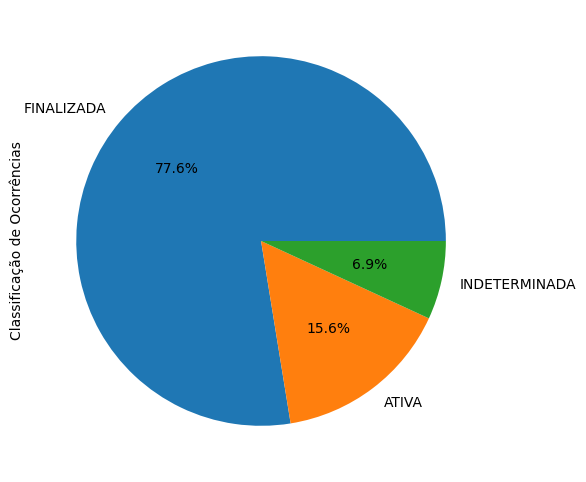

In [4]:
plt.style.use('default')

dados['status_investigacao'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Classificação de Ocorrências" ,figsize=(6, 6))
plt.show()

Aqui temos a representação dos status feitos nas investrigações.

Podemos observar no gráfico que no total de 4061 ocorrências **77.6%** tem seus casos finalizados por conta da maioria dos casos não serem graves

**15.6%** (815) Ativas


**6.9** (360) Indeterminadas


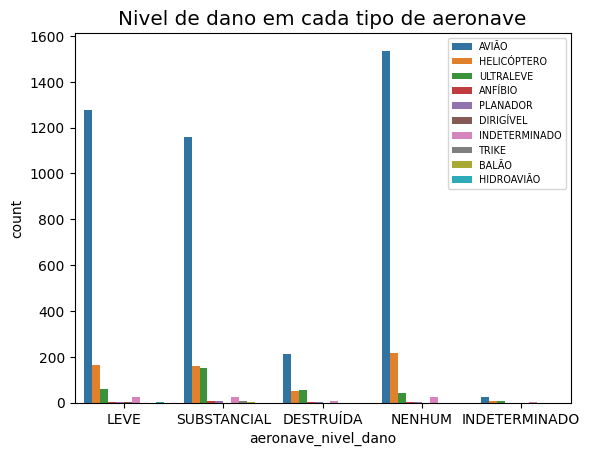

In [5]:
sns.countplot(x='aeronave_nivel_dano',hue= 'aeronave_tipo', data=dados)
plt.legend(fontsize='x-small', loc='upper right')
plt.title('Nivel de dano em cada tipo de aeronave', fontsize = 'x-large')
plt.style.use('seaborn-dark-palette')
plt.show()

Podemos observar nesse gráfico sobre a **investigação para cada tipo de aeronave** que o **avião** é o tipo de aeronave mais danificado nas operações.

Seguido por **helicóptero** e **ultraleves** (aeródino de baixas velocidade, capacidade de carregamento, potência e de baixos peso e custo)

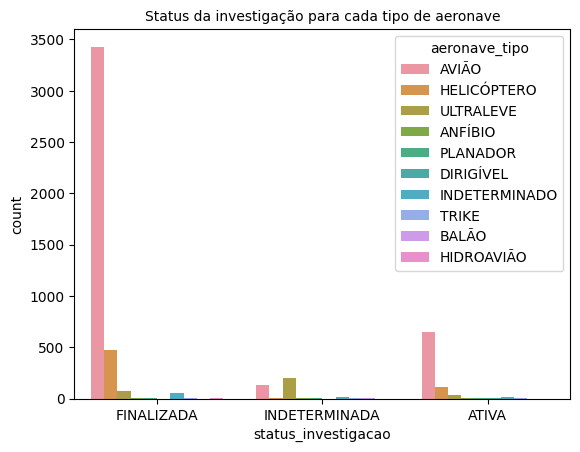

In [6]:
sns.countplot(x='status_investigacao',hue= 'aeronave_tipo', data=dados)
plt.title('Status da investigação para cada tipo de aeronave', fontsize = 'medium')
plt.style.use('seaborn-dark-palette')

Temos a representação do **Status da investigação para cada tipo de aeronave**.

Observamos que o **avião** é onde ocorre a maioria das ocorrências finalizadas. Os tipos **helicóptero** e **ultraleves** e **Hidroavião** são os que vem em seguida.



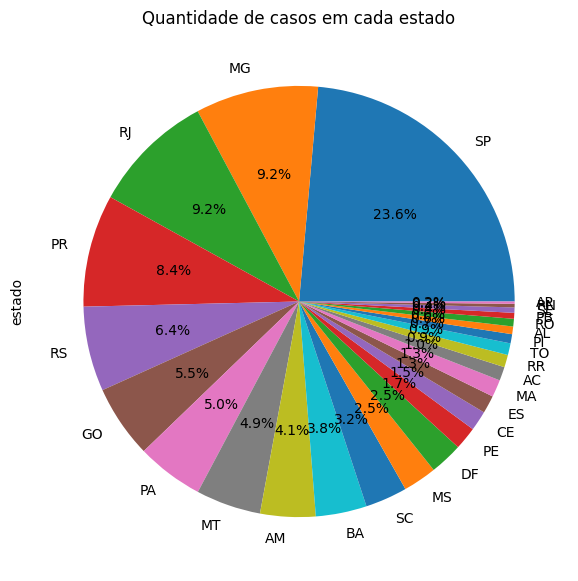

In [7]:
plt.style.use('default')
plt.title('Quantidade de casos em cada estado', fontsize = 'large')

dados['estado'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,figsize=(7, 7))
plt.show()

**São Paulo** é o estado em onde mais ocorrências aconteceram seguido por **Minas Gerais** e **Rio de Janeiro** empatados.

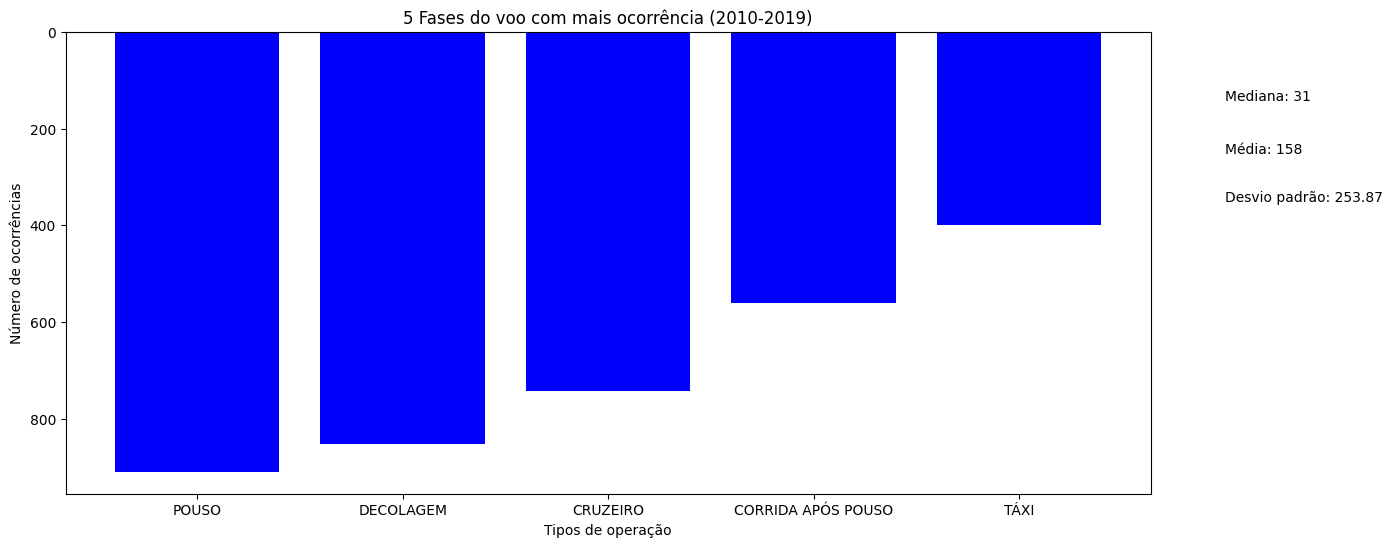

In [8]:
aeronave_operacao = Counter(dados['aeronave_fase_operacao'])
aeronave_fase = sorted(aeronave_operacao, key = aeronave_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_operacao.values()), reverse = True)
plt.style.use("default")
fig,ax = plt.subplots(figsize=(14, 6))

x=aeronave_fase[:5] 
y=contador_aeronave_fase_operacao[:5]

rects1=ax.bar(x, y,color='blue')
ax.set_xticks(x)

ax.invert_yaxis()
plt.xlabel('Tipos de operação')
plt.ylabel("Número de ocorrências")
plt.title('5 Fases do voo com mais ocorrência (2010-2019)')
plt.text(5, 250.9, 'Média: %d'%(np.mean(np.array(contador_aeronave_fase_operacao))))
plt.text(5, 140.9, 'Mediana: %d'%(np.median(np.array(contador_aeronave_fase_operacao))))
plt.text(5, 350.7, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fase_operacao)))
plt.show()

Temos a representação das fases do voo que possuem a maior ocorrencia e seus tipos.

É possivel observar que temos a fase de **pouso** com os maiores valores.

Obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão:

Média: 158


Mediana: 31


Desvio padrão: 253.87

# Regressão linear

In [9]:
aeronave_assentos = Counter(dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

In [10]:
# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

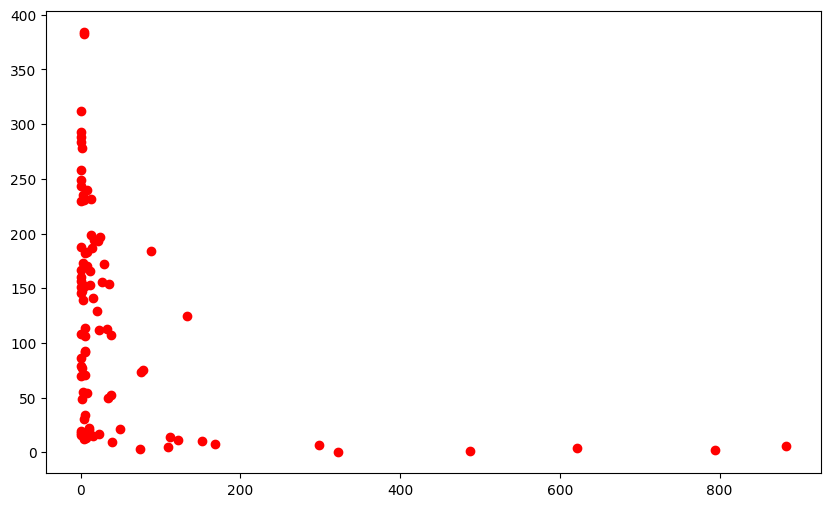

In [11]:
# plotando o gráfico da regressão

plt.figure(figsize=(10,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values, c='red')

# traçando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), c='blue', linewidth=3, linestyle=':')
plt.show()

O gráfico acima representou a quantidade de acidentes aéreos ocorridos de 2010 até 2019, e sua relação a quantidade de cadeiras das aeronaves 

Através dos dados extraídos foi possível alocar e analisar os resultados que foram obtidos por meio da regressão linear, e desta forma pode-se dizer que ao passar dos anos houve uma diminuição na incidência destes acidentes.

Essa diminuição pode estar associada às melhorias técnicas, com a utilização de novas tecnologias e na aplicação dos protocolos que tornam o ambiente aéreo e as aeronaves mais seguras.

# Relatório Final
Este projeto foi muito importante para o nosso conhecimento, pois permitiu-nos ficar a
conhecer melhor sobre a aviação brasileira e seus casos de acidente, bem como aprimorar nosso conhecimento em Python, além de ter-nos permitido aperfeiçoar
competências de investigação, seleção e organização.

Após a realização do presente trabalho, concluímos que tais ocorrências de acidentes talvez possam gerar bastante receio nos potenciais passageiros, mas que as chances de acidentes aéreos são muito menores do que de carros ou outras locomoções terrestres, sendo um meio de transporte muito seguro, muito por conta de seus funcionários competentes.

Cumprimos todos os objetivos que tínhamos proposto, tais como: a explicação das bibliotecas utilizadas, gráficos com as devidas explicações sobre os resultados obtido e seus códigos. 


# Referências bibliográficas
LOPES *et al*. (2022) "Introdução à Análise Exploratória de Dados com Python" cap.08,p03.

VINICIUS (2020) "Boas Práticas de Visualização de Dados Parte II" acesso em 08/2020: https://dadosaocubo.com/boas-praticas-de-visualizacao-de-dados-parte-ii#:~:text=3.-,Seaborn,melhorar%20a%20visualiza%C3%A7%C3%A3o%20do%20gr%C3%A1fico.

BRAGA et al. (2021) "SOLUÇÃO DE EQUAÇÕES DIFERENCIAIS EM PYTHON APLICADA A PROBLEMAS DE ENGENHARIA" v.01,p02.

PYTHON (2022) Collections "Tipos de dados de contêineres" acesso em 04/2022: https://docs.python.org/pt-br/3/library/collections.html#:~:text=Um%20Counter%20%C3%A9%20uma%20subclasse,para%20contagem%20de%20objetos%20hashe%C3%A1veis.

CENIPA (2016) FCA 58-1 Ocorrências Aeronáuticas: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronáuticos.

DELFTSTACK (2021) "Função Pandas Series.head()"
acesso em 04/2021: https://www.delftstack.com/pt/api/python-pandas/pandas-series-series.head-function/#:~:text=head(),-Pandas%20Pandas%20Series&text=A%20fun%C3%A7%C3%A3o%20Python%20Pandas%20Series,valores%20selecionados%20desde%20o%20in%C3%ADcio.

PACHECO (2021) "Introdução ao Scikit-learn - Parte 1: uma visão geral" acesso em 06/2021: http://computacaointeligente.com.br/outros/intro-sklearn-part-1/

DELFTSTACK (2021) "Suprimir avisos em Python" acesso em 07/2021: https://www.delftstack.com/pt/howto/python/suppress-warnings-python/